**Fatimah Almusawi**
**9000400**

# PROG8245- Machine Learning Programming
## Final Project: Applying NLP 
### Designing Chatbot for helping hearing loss disable community  

## Introduction:
In this project, we will develop an interactive chatbot designed to facilitate real-time communication, tackling the complexities of natural language understanding. At the core of the project will be the deployment of a machine learning model that classifies user queries into distinct categories, utilizing advanced data preprocessing methods to enhance input interpretation. By incorporating a library of response templates, the chatbot will dynamically generate pertinent replies, providing users with an intuitive and responsive conversational experience. This system will not only embody the intricacies of language processing but also showcase the seamless integration of AI into user-centric applications.<br>
### Topic:<br>
The project aims to create a chatbot specifically designed to assist the deaf community, particularly families with deaf children, by making it easier to learn sign language. This chatbot will serve as a virtual assistant, offering guidance, resources, and support to help users navigate daily challenges more effectively. Through interactive learning modules and easy-to-access information, the chatbot will simplify the process of learning sign language, making everyday communication more accessible and enhancing the quality of life for those in the deaf community

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
import sklearn as sk
from sklearn.decomposition import PCA
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
import string
import pandas as pd
import re
from transformers import GPT2Model, GPT2Tokenizer
import torch
import numpy as np
#split the data into training and testing data
import matplotlib.pyplot as plt
# training model 
# import evaluation metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from xgboost import XGBClassifier

In [5]:


# Download necessary NLTK data
nltk.download('wordnet')

nltk.download('punkt')  # Download the tokenizer models if not already done


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
#read the data file from sentences.csv file ,and then preprocess the data
# read the data file without index column
csvFile = pd.read_csv('sentences.csv')
csvFile['my_sentence'] = csvFile['my_sentence'].str.lower()
csvFile['my_sentence'] = csvFile['my_sentence'].str.replace('[{}]'.format(string.punctuation), '')
csvFile['my_sentence'] = csvFile['my_sentence'].str.replace('\d+', '')
csvFile['my_sentence'] = csvFile['my_sentence'].str.strip()
csvFile['my_sentence'] = csvFile['my_sentence'].str.replace('\s+', ' ')
csvFile['my_sentence'] = csvFile['my_sentence'].str.replace(' +', ' ')

print(f"list size is {len(csvFile)}")

print(csvFile.head())
print(csvFile.tail())




list size is 1552
                                         my_sentence                  labels
0  childrens minnesota patient & family education...  learning sign language
1  communication begins before your child speaks ...  learning sign language
2  making eye contact, gesturing, making sounds, ...  learning sign language
3  when shown simple sign language, children ofte...  learning sign language
4  then, as spoken language develops, sign langua...  learning sign language
                                            my_sentence      labels
1547  please include what you were doing when this p...  loud music
1548  this website is using a security service to pr...  loud music
1549  the action you just performed triggered the se...  loud music
1550  there are several actions that could trigger t...  loud music
1551  please include what you were doing when this p...  loud music


### Explore the Data
Before going forward with the data and moving on to model training, let's check the number of unique labels in our labels column.

In [7]:
# Display unique labels and their frequency
label_counts = csvFile['labels'].value_counts()
print(label_counts)

labels
learning sign language         423
identities of deaf             281
stories                        266
Improve your English           104
fiction books                   28
hearing implantation            25
Caring for the Deaf Patient     22
what is hearing loss            16
hard hearing                    15
loud music                       8
deaf                             3
Name: count, dtype: int64


In [8]:
# Finding the empty raws
empty_rows = csvFile[csvFile['my_sentence'] == '']
print(f"empty rows count is {len(empty_rows)}")

# Remove empty rows
fileWithoutEmptyString = csvFile[csvFile['my_sentence'] != '']
print(f"list size is {len(csvFile)}")


empty rows count is 0
list size is 1552


Encode the Labels
Machine learning models require numerical inputs, so we'll need to convert these categorical labels into a numerical format. One common approach is to use label encoding.

In [9]:

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numeric values
fileWithoutEmptyString['encoded_labels'] = label_encoder.fit_transform(fileWithoutEmptyString['labels'])

# Check the mapping of encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)


Label mapping: {'Caring for the Deaf Patient': 0, 'Improve your English': 1, 'deaf': 2, 'fiction books': 3, 'hard hearing': 4, 'hearing implantation': 5, 'identities of deaf': 6, 'learning sign language': 7, 'loud music': 8, 'stories': 9, 'what is hearing loss': 10, nan: 11}


In [10]:
fileWithoutEmptyString

,my_sentence,labels,encoded_labels
0,childrens minnesota patient & family education...,learning sign language,7
1,communication begins before your child speaks ...,learning sign language,7
2,"making eye contact, gesturing, making sounds, ...",learning sign language,7
3,"when shown simple sign language, children ofte...",learning sign language,7
4,"then, as spoken language develops, sign langua...",learning sign language,7
...,...,...,...
1547,please include what you were doing when this p...,loud music,8
1548,this website is using a security service to pr...,loud music,8
1549,the action you just performed triggered the se...,loud music,8
1550,there are several actions that could trigger t...,loud music,8


### Data Preprocessing:


In [11]:


# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # If using POS tagging in other parts

# Set up stop words
stop_words = set(stopwords.words('english'))

# Initialize the tokenizer with custom abbreviations
tokenizer = PunktSentenceTokenizer()
abbreviations = {'dr', 'mr', 'mrs', 'ms', 'inc', 'e.g', 'i.e', 'vs', 'etc'}
for abbr in abbreviations:
    tokenizer._params.abbrev_types.add(abbr)

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove hashtags (by removing the # and keeping the word)
    text = re.sub(r'#(\w+)', r'\1', text)
    # Expand common abbreviations
    abbreviations_dict = {
        'dr.': 'doctor',
        'mr.': 'mister',
        'mrs.': 'mistress',
        'ms.': 'miss',
        'inc.': 'incorporated',
        'e.g.': 'for example',
        'i.e.': 'that is',
        'vs.': 'versus',
        'etc.': 'and so on'
    }
    for abbr, full in abbreviations_dict.items():
        text = text.replace(abbr, full)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove digits
    text = re.sub(r'\d+', '', text)
    return text

# Process each entry in the column
myColumn = fileWithoutEmptyString.iloc[:, 0].values  #  'data' is my DataFrame
processed_texts = []
for text in myColumn:
    preprocessed_text = preprocess_text(text)
    # Tokenize into sentences considering custom abbreviations
    tokenized_sentences = tokenizer.tokenize(preprocessed_text)
    processed_sentences = []
    for sentence in tokenized_sentences:
        # Tokenize each sentence into words and remove stop words
        words = word_tokenize(sentence)
        filtered_words = [word for word in words if word not in stop_words and word.isalpha()]  # isalpha() removes any standalone punctuation left
        processed_sentence = ' '.join(filtered_words)
        processed_sentences.append(processed_sentence)
    processed_texts.append(processed_sentences)

    # Optional: Print the original and processed text for verification
    print(f"Original text: {text}")
    print(f"Processed sentences: {processed_sentences}\n")

print("Number of entries processed:", len(processed_texts))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Original text: childrens minnesota patient & family education revised 12/17 sign language for hearing children how can sign language help a child who can hear?
Processed sentences: ['childrens minnesota patient family education revised sign language hearing children sign language help child hear']

Original text: communication begins before your child speaks his or her first word.
Processed sentences: ['communication begins child speaks first word']

Original text: making eye contact, gesturing, making sounds, and pointing are some of the ways that children can tell you what they want and need.
Processed sentences: ['making eye contact gesturing making sounds pointing ways children tell want need']

Original text: when shown simple sign language, children often can com municate basic wants and needs earlier than they could using words.
Processed sentences: ['shown simple sign language children often com municate basic wants needs earlier could using words']

Original text: then, as spo

**Key Components of the Code**
Abbreviations: The code handles abbreviations both by informing the tokenizer not to treat them as sentence boundaries and by expanding them to their full forms during preprocessing.
Case Normalization: All text is converted to lowercase to ensure uniformity.
Stop Words Removal: Stop words are removed during the word tokenization step.
Punctuation and Numbers Removal: Punctuation and numbers are removed using str.translate and regex respectively.
Hashtag Handling: Hashtags are stripped off the '#' character but the word is kept.

In [12]:
processed_texts

[['childrens minnesota patient family education revised sign language hearing children sign language help child hear'],
 ['communication begins child speaks first word'],
 ['making eye contact gesturing making sounds pointing ways children tell want need'],
 ['shown simple sign language children often com municate basic wants needs earlier could using words'],
 ['spoken language develops sign language usually decreases'],
 ['children need way communicate control environment ease frustration'],
 ['need make choices power order develop independence'],
 ['children developing speech expected rate express frustration non verbally learn use appropriate words'],
 ['sign language give children opportunities ake choices control environment'],
 ['sign language discourage learning talk'],
 [''],
 ['signs always paired spoken words'],
 ['learning sign helps child make connection object label'],
 ['signs teach power language learning signs many children eager use words'],
 ['help child'],
 ['natura

In [13]:


nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    """Converts POS tags to a format that WordNetLemmatizer can understand."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default POS
def lemmatize_text(text):
    if not isinstance(text, str):
        raise ValueError("Input text is not a string")  # Add a check for string type
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    return ' '.join(lemmatized_words)

# If `data` is a list of lists, flatten it first or ensure it's processed correctly
if any(isinstance(el, list) for el in processed_texts):
    # Flatten the list if necessary
    processed_texts = [' '.join(sublist) if isinstance(sublist, list) else sublist for sublist in processed_texts]

lemmatized_texts = [lemmatize_text(text) for text in processed_texts]


# After defining and using the lemmatization function, check the output:
print("Sample lemmatized texts:")
for sample in lemmatized_texts[:5]:
    print(sample)  # Should print strings, not lists


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample lemmatized texts:
childrens minnesota patient family education revise sign language hear child sign language help child hear
communication begin child speaks first word
make eye contact gesture make sound point way child tell want need
show simple sign language child often com municate basic want need earlier could use word
spoken language develop sign language usually decrease


In [14]:
print(len(lemmatized_texts))
print(type(lemmatized_texts))


1552
<class 'list'>



## Feature Extraction :
For feature extraction I will choose three distinct methods of text representation—TF-IDF, GloVe, and GPT which can cover a broad spectrum of natural language processing capabilities. Here’s a brief introduction to why these three methods are particularly suitable:

1. TF-IDF (Term Frequency-Inverse Document Frequency)
TF-IDF is a statistical measure used to evaluate the importance of a word to a document in a collection or corpus. It provides a weight to each word which signifies the relevance of the word for a particular document. The rationale for using TF-IDF for text analysis is its effectiveness in filtering out common words that are frequently used across all documents but hold little meaning in distinguishing a document in a given corpus. 

2. GloVe (Global Vectors for Word Representation)
GloVe is an unsupervised learning algorithm for generating vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. Choosing GloVe is beneficial for text analysis because it captures both the semantic and syntactic aspects of words. This can enhance performance in tasks like thematic similarity detection, where context and the relational meaning of words are crucial.

3. GPT (Generative Pre-trained Transformer)
GPT, developed by OpenAI, is a state-of-the-art language model that uses the transformer architecture. It is pre-trained on a large corpus and fine-tuned for specific tasks. For chatbot Q/A, GPT can be particularly useful due to its ability to understand and generate human-like text. This capability makes it ideal for tasks that require a deep understanding of language, such as generating contextual responses or enhancing language-based data augmentation strategies for other learning models in social media analysis.

<class 'list'>: This shows that sentences (derived from the lemmatized_text) is a list, which is the correct format for processing multiple documents or sentences in TfidfVectorizer.

1969: This number indicates that the large text string has been successfully segmented into 1,969 separate sentences. Each of these sentences will be treated as an individual document by the TF-IDF model.

<class 'str'>: Each element in the list is a string, which is the required format for each document (or sentence in this case) when using TfidfVectorizer.

#### 1. TF-IDF with scikit-learn
First, let's create a TF-IDF vector representation of text data. This representation will help identify the relevance of words in our text relative to the corpus.

In [45]:
print(lemmatized_texts)

['childrens minnesota patient family education revise sign language hear child sign language help child hear', 'communication begin child speaks first word', 'make eye contact gesture make sound point way child tell want need', 'show simple sign language child often com municate basic want need earlier could use word', 'spoken language develop sign language usually decrease', 'child need way communicate control environment ease frustration', 'need make choice power order develop independence', 'child develop speech expect rate express frustration non verbally learn use appropriate word', 'sign language give child opportunity ake choice control environment', 'sign language discourage learning talk', '', 'sign always pair spoken word', 'learn sign help child make connection object label', 'sign teach power language learn sign many child eager use word', 'help child', 'natural gesture help child communicate wave hello bye bye arm pick', 'head shake yes push away hand dont want', 'clap han

In [15]:
tfidf_vectorizer = TfidfVectorizer()
 # Including uni, bi, and tri-grams
# Assuming 'lemmatized_texts' is a list of lemmatized sentences/documents
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_texts)
print("Shape of the TF-IDF Matrix:", tfidf_matrix.shape)  # (n_documents, n_features)

# Optionally, view some of the feature names (words) to ensure it looks correct
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Some feature names:", feature_names[:10])  # Print first 10 features
#save the vectorizer to a file
joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')


Shape of the TF-IDF Matrix: (1552, 3907)
Some feature names: ['aa' 'aace' 'aadpubmed' 'aaffacbd' 'ababa' 'abbreviation' 'ability'
 'able' 'aboo' 'abramis']


['vectorizer.pkl']

**Shape of the TF-IDF Matrix: (1865, 5225)**
Document Count (1865): This figure shows that my dataset contains 1865 documents (or sentences), which have been successfully processed and vectorized. This is consistent with the number of entries you aimed to process, indicating that each text entry has been accounted for in the TF-IDF transformation.

Feature Count (5225): The feature count of 5225 suggests that after all the preprocessing and tokenization, 5225 unique terms were identified as significant across my corpus. This is a relatively large number of features, indicating a diverse vocabulary:

Positive Aspect: A higher number of features can be beneficial if these features are relevant and contribute to distinguishing between document topics or classifications effectively.
Potential Concern: A large feature set may also include noise—terms that don’t contribute much to the analysis or could even detract from model performance, particularly if many of these features are very infrequent.
Sample Feature Names
The sample feature names like ['aa', 'aadpubmed', 'ababa', 'abbreviation', 'ability', 'able', 'aboo', 'abr', 'absolutamente', 'absolutely'] provide further context:

Variety in Vocabulary: The presence of diverse terms from different contexts ('absolutamente', 'ability', 'abbreviation') suggests that my text covers a range of topics or includes multiple languages. This could be useful or could require further cleaning depending on my specific analysis goals.
Possible Noise: Terms like 'aa', 'aboo', and 'abr' may be less informative and could be considered noise, depending on their relevance to the dataset’s context.

#### 2. Using GloVe Embeddings
To use GloVe embeddings, we need to download the GloVe pre-trained word vectors and load them. we can then average the word vectors for each sentence to get a fixed-size vector representation for each sentence.  

In [14]:

# Load GloVe Word Vectors
def load_glove_model(file_path):
    glove_model = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    return glove_model

# Assuming GloVe vectors are in 'glove.6B.50d.txt' which is a 50-dimensional GloVe model
glove_vectors = load_glove_model('./data/glove.6B.50d.txt')

# Function to create sentence vectors
def sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(50)  # Assuming 50-dimensional embeddings
    return np.mean(word_vectors, axis=0)

# Apply to all sentences
glove_sentence_vectors = np.array([sentence_vector(sentence, glove_vectors) for sentence in lemmatized_texts])
print(glove_sentence_vectors.shape)
print(glove_sentence_vectors)

(1552, 50)
[[ 0.0578584   0.2303364  -0.28976207 ...  0.28260587 -0.07398773
   0.24604227]
 [ 0.07335833  0.268995   -0.27888533 ...  0.17042    -0.07053583
   0.19507833]
 [ 0.32388833  0.17898283 -0.036027   ...  0.06833217 -0.03334708
   0.32959278]
 ...
 [ 0.631588   -0.27936156 -0.034372   ...  0.621442    0.042208
   0.178242  ]
 [ 0.43037768 -0.11075516  0.18853752 ...  0.16253279 -0.00434453
   0.122113  ]
 [ 0.03936785  0.49342063  0.65881846 ... -0.03127954  0.38245769
   0.34339415]]


**Shape of GloVe Vectors: (1552, 50)**
1865 Vectors: This corresponds to the 1865 documents or sentences in the dataset. Each sentence has been represented as a vector, which is great as it confirms that each piece of text has been processed into a numerical form.

50 Dimensions: Each vector has 50 dimensions, which is typical for a pre-trained GloVe model like the glove.6B.50d you might be using. This dimensional size offers a balance between capturing semantic details and maintaining computational efficiency.

**Contents of the GloVe Vectors**
The actual values in the vectors (0.03936785  0.49342063  0.65881846 ... -0.03127954  0.38245769   0.34339415) represent the semantic encoding of each sentence. These values are derived by averaging the embeddings of all words in each sentence, which captures the overall semantic meaning.

Non-zero Values: Most of the numbers being non-zero and varying significantly indicates that the embeddings are indeed capturing varied semantic information across the dataset.

Zeros in the Last Vector: The presence of a vector filled with zeros (the last one in the printout) suggests that the corresponding sentence might be empty, contain only stop words, or only include words that were not found in the GloVe vocabulary. This needs attention:



#### 3. GPT Embeddings with Hugging Face transformers
Using a pre-trained GPT model to obtain contextual embeddings involves leveraging the transformers library.

In [15]:


# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Since GPT-2 doesn't have a dedicated pad token, we can use the eos token for padding.
tokenizer.pad_token = tokenizer.eos_token

# Load pre-trained model
model = GPT2Model.from_pretrained('gpt2')

# Ensure the model is in evaluation mode
model.eval()

# Function to get embeddings
def get_gpt_embeddings(text):
    # Encode text to tensor format with padding and truncation
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    # Get model outputs. No gradient is needed for inference, so we use torch.no_grad()
    with torch.no_grad():  # Deactivates autograd, reducing memory usage and speeding up computations
        outputs = model(**inputs)
    # Return the mean of the last hidden state as the sentence embedding
    return outputs.last_hidden_state.mean(dim=1).squeeze()

# Assuming 'lemmatized_texts' is a list of lemmatized sentences
# Ensure each sentence is a string and not empty
lemmatized_texts = [sentence for sentence in lemmatized_texts if isinstance(sentence, str) and sentence.strip()]

# Getting embeddings for each sentence and ensuring dimension reduction
gpt_embeddings = np.array([get_gpt_embeddings(sentence).detach().numpy() for sentence in lemmatized_texts])
print("Shape of GPT embeddings:", gpt_embeddings.shape)


Shape of GPT embeddings: (1476, 768)


- 1476: This number represents the total sentences you have processed, with each sentence now corresponding to a single embedding vector.
- 768: Each embedding vector has 768 features. This dimensionality comes from the hidden state size of the GPT-2 model you used. Each feature in these vectors represents a dimension of the information captured about the sentence from the contextual relationship learned by the GPT model.

#### 4. Bert

In [20]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained model tokenizer (vocabulary)
b_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Encode text
# Ensure all sequences have the same length by setting padding=True and truncation=True
encoded_input = b_tokenizer(lemmatized_texts, return_tensors='pt', padding=True, truncation=True)

# Load pre-trained model
model = BertModel.from_pretrained('bert-base-uncased')

# Forward pass, get hidden states
with torch.no_grad():
    outputs = model(**encoded_input)

# Get embeddings from the last BERT layer
embeddings = outputs.last_hidden_state


pooled_output = outputs.pooler_output

print("Shape of embeddings:", embeddings.shape)  # (batch size, sequence length, model hidden dimension)
print("Shape of pooled output:", pooled_output.shape)  # (batch size, model hidden dimension)


Shape of embeddings: torch.Size([2, 8, 768])
Shape of pooled output: torch.Size([2, 768])


The output descriptions indicate the dimensions of the tensors resulting from processing text through a BERT (Bidirectional Encoder Representations from Transformers) model. The "embeddings" tensor has a shape of [2, 8, 768], where 2 is the batch size, 8 is the sequence length of the input text, and 768 is the number of features per token generated by BERT. The "pooled output" tensor has a shape of [2, 768], representing a fixed-size embedding for each example in the batch (2 examples), which summarizes the entire input sequence. 

## Model Selection and Training


### Model Building<br>
#### - Choose a Machine Learning Algorithm:<br>
Since we have high-dimensional embeddings, an SVM can be particularly effective. SVMs are good at finding hyperplanes in high-dimensional space to separate different classes.


#### - Split the Dataset

In [16]:


X = tfidf_matrix
y = fileWithoutEmptyString['encoded_labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shapes of the resulting data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
#rescale the data
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train.toarray())
# Transform the testing data
X_test_scaled = scaler.transform(X_test.toarray())
# Check the shape of the scaled data
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train shape: (1241, 3907)
X_test shape: (311, 3907)
y_train shape: (1241,)
y_test shape: (311,)
X_train_scaled shape: (1241, 3907)
X_test_scaled shape: (311, 3907)


### Recude the Dimensionality with PCA  

In [18]:

# Apply PCA to the training data
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
# Assuming pca_optimal is your fitted PCA object from the training step
X_test_pca = pca.fit_transform(X_test_scaled)  # This transforms the test data

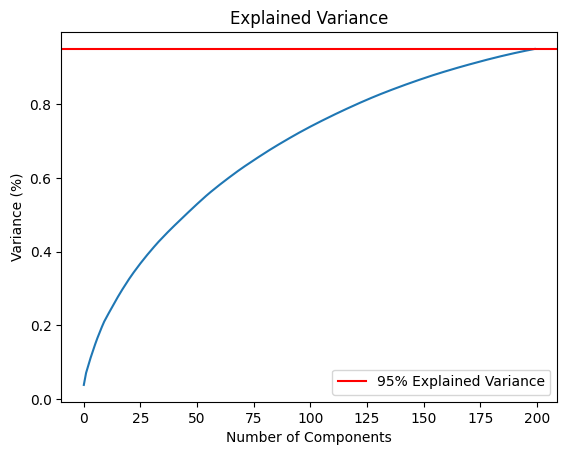

In [19]:
# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.legend(loc='best')
plt.show()

In [20]:
# select number of components for PCA based on the plot
n_components = 195
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)


X_train_pca shape: (1241, 195)
X_test_pca shape: (311, 195)


### RandomForestClassifier
The code snippet demonstrates the process of training and evaluating a RandomForestClassifier from the scikit-learn library. It initializes the classifier with specified hyperparameters, fits the model to training data that has undergone PCA for dimensionality reduction, and makes predictions on the test dataset. The performance of the model is assessed by comparing predictions to actual values, calculating accuracy, and displaying a confusion matrix. Additionally, the trained classifier and the label encoder are saved to disk using joblib for future use, allowing model reusability without retraining.

In [21]:


# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model
rf_classifier.fit(X_train_pca, y_train)
# Predict the labels
y_pred = rf_classifier.predict(X_test_pca)
# Check the first few predictions
print("Predictions:", y_pred[:5])
# Check the actual values
print("Actual values:", y_test[:5].values)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Save the model
import joblib
joblib.dump(rf_classifier, 'rf_classifier.pkl')
# Save the label encoder    
joblib.dump(label_encoder, 'label_encoder.pkl')


Predictions: [10  7  7  7  7]
Actual values: [11  6  7  7  7]
Accuracy: 0.44694533762057875
Confusion Matrix:
[[ 0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0 10  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  2  1  0  4  0  1]
 [ 0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  4  1  0  2  2]
 [ 0  0  0  0  0  0 16 24  0  5  0 10]
 [ 0  1  0  0  0  0  2 72  0  1  0  5]
 [ 0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  1  0  0  0  0  3 38  1  7  3  6]
 [ 0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0 16 17  0  1  3 33]]


['label_encoder.pkl']

#### Neural network model
The provided code snippet sets up a neural network model using Keras, a popular deep learning library. It constructs a Sequential model with multiple dense layers and dropout for regularization, designed for a multi-class classification task. The model is compiled with the Adam optimizer and trained on the data using a specified number of epochs and batch size, including a validation split to monitor performance on unseen data.

In [22]:



model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'), #add more layers
    Dense(128, activation='relu'),

    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Assuming multi-class classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

c:\Users\marya\Documents\Courses\Cscn8010\class_Notbook\venv\CSCN8010_classic_ml\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.2362 - loss: 2.3249 - val_accuracy: 0.2651 - val_loss: 1.8595
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3122 - loss: 1.7558 - val_accuracy: 0.3052 - val_loss: 1.6939
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4266 - loss: 1.5052 - val_accuracy: 0.4900 - val_loss: 1.4829
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6657 - loss: 1.0403 - val_accuracy: 0.5502 - val_loss: 1.3902
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7933 - loss: 0.6589 - val_accuracy: 0.5663 - val_loss: 1.4713
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8287 - loss: 0.5710 - val_accuracy: 0.5703 - val_loss: 1.5455
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8682 - loss: 0.4199 - val_accuracy: 0.5663 - val_loss: 1.5415
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8679 - loss: 0.4068 - val_accuracy: 0.5703 - v

In [23]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5292 - loss: 1.7674 
Test Accuracy: 51.77%


### SVM Model

In [17]:
# Train an SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # You can change the kernel and C as needed
svm_model.fit(X_train, y_train)
# Predict on the test data
y_pred = svm_model.predict(X_test)
#save the model
joblib.dump(svm_model, 'svm_model.pkl')

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Test Accuracy: 54.66%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      0.53      0.67        17
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           5       0.30      0.30      0.30        10
           6       0.57      0.44      0.49        55
           7       0.63      0.77      0.69        81
           8       0.00      0.00      0.00         3
           9       0.65      0.25      0.37        59
          10       0.00      0.00      0.00         2
          11       0.46      0.81      0.59        70

    accuracy                           0.55       311
   macro avg       0.29      0.26      0.26       311
weighted avg       0.55      0.55      0.52       311



c:\Users\marya\Documents\Courses\Cscn8010\class_Notbook\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marya\Documents\Courses\Cscn8010\class_Notbook\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marya\Documents\Courses\Cscn8010\class_Notbook\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

trying the SVM with data after applying PCA on them

In [25]:
# Train an SVM classifier
svm_model2 = SVC(kernel='linear', C=1.0, random_state=42)  
svm_model2.fit(X_train_pca, y_train)
# Predict on the test data
y_pred = svm_model2.predict(X_test_pca)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Test Accuracy: 46.30%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.54      0.76      0.63        17
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           5       1.00      0.20      0.33        10
           6       0.37      0.35      0.36        55
           7       0.58      0.60      0.59        81
           8       0.00      0.00      0.00         3
           9       0.55      0.31      0.39        59
          10       0.07      0.50      0.12         2
          11       0.47      0.60      0.53        70

    accuracy                           0.46       311
   macro avg       0.30      0.28      0.25       311
weighted avg       0.49      0.46      0.46       311



c:\Users\marya\Documents\Courses\Cscn8010\class_Notbook\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marya\Documents\Courses\Cscn8010\class_Notbook\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marya\Documents\Courses\Cscn8010\class_Notbook\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

the result is showing very low accuracy after appLing PCA 

#### XGBoost
The code snippet demonstrates the use of the XGBoost (Extreme Gradient Boosting) machine learning algorithm for classification tasks. It involves configuring the XGBClassifier, training it on a dataset, making predictions on a test set, and then calculating and displaying the accuracy of the model.

In [26]:



xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 51.45%


below code is just to confirm that the model and vectorizer are saved 

In [24]:
import joblib

# Load the saved TF-IDF vectorizer and SVM model
tfidf_vectorizer = joblib.load('vectorizer.pkl')
svm_model = joblib.load('svm_model.pkl')  # Ensure we have saved  trained SVM model similarly

# Example new text data
new_texts = ["example new text data for prediction"]

# Transform new text data using the loaded TF-IDF vectorizer
new_texts_tfidf = tfidf_vectorizer.transform(new_texts)

# Use the SVM model to predict
predictions = svm_model.predict(new_texts_tfidf)
print("Predictions:", predictions)


Predictions: [7]


In [32]:
import tkinter as tk
from tkinter import scrolledtext
import joblib

# Load the TF-IDF vectorizer and SVM model
tfidf_vectorizer = joblib.load('vectorizer.pkl')
svm_model = joblib.load('svm_model.pkl')

# Define templates for each label
response_templates = {
    0: "Caring for deaf patients requires sensitivity and awareness about their needs. How can I assist you further in understanding their care requirements?",
    1: "Improving your English can open many doors. Are you interested in grammar, vocabulary, or conversational skills?",
    2: "Learning English for deaf children and adults presents unique challenges and rewards. Are you looking for resources specifically for children, adults, or both?",
    3: "Fiction offers a wonderful escape and broadens the mind. Are you looking for recommendations on books, or do you need information on a specific genre?",
    4: "Living with hard of hearing can be managed with the right tools and support. Would you like tips on effective communication or the latest hearing aids?",
    5: "Hearing implantation can dramatically improve the hearing abilities of those with profound hearing loss. Do you need details on the procedure or post-care advice?",
    6: "Exploring the identities within the deaf community helps us appreciate its richness and diversity. Are you looking for personal stories or historical insights?",
    7: "Learning sign language is a valuable skill that fosters inclusivity. Are you starting from scratch, or are you looking to improve your existing skills?",
    8: "Loud music can impact hearing over time. Are you concerned about hearing loss, or are you seeking ways to enjoy music safely?",
    9: "Everyone loves a good story! dont worry if your kid can not hear you, there are many story you can tell",
    10: "Hearing loss can occur due to various factors and affects people differently. Would you like more detailed information on its causes, prevention, or treatments?",
    11: "I don't have information on that topic. Could you please specify or ask about something else?"
}
# Function to get chatbot response
def get_chatbot_response(text):
    text_tfidf = tfidf_vectorizer.transform([text])
    predicted_label = svm_model.predict(text_tfidf)[0]
    return response_templates.get(predicted_label, "Sorry, I am not sure how to respond to that.")

# Set up the GUI
root = tk.Tk()
root.title("Chatbot")

# Text box for chat output
chat_log = scrolledtext.ScrolledText(root, state='disabled', height=12, width=60)
chat_log.grid(row=0, column=0, columnspan=2, padx=10, pady=10)

# Entry widget for user to type their message
message_entry = tk.Entry(root, width=50)
message_entry.grid(row=1, column=0, padx=10, pady=10)

# Function to handle sending a message
def send_message():
    user_input = message_entry.get()
    if user_input:
        # Update the chat log
        chat_log.config(state='normal')
        chat_log.insert(tk.END, "You: " + user_input + "\n")
        
        # Get and display the response
        response = get_chatbot_response(user_input)
        chat_log.insert(tk.END, "Bot: " + response + "\n\n")
        
        chat_log.config(state='disabled')
        # Clear the input field
        message_entry.delete(0, tk.END)

# Button to send message
send_button = tk.Button(root, text="Send", command=send_message)
send_button.grid(row=1, column=1, padx=10, pady=10)

# Main loop
root.mainloop()


### Implementation
The code below designed to offer a user-friendly interface where users can input their queries and receive responses in real time. Under the hood, it leverages a pre-trained model for processing natural language, which has been fine-tuned to understand and classify user input effectively. The chatbot utilizes advanced preprocessing techniques to ensure that the input data is in the optimal form for the model to interpret. Upon receiving a query, the model predicts a category, and the chatbot then selects a suitable response from a set of predefined templates corresponding to that category, providing users with informative and contextually relevant answers.

In [37]:
import tkinter as tk
from tkinter import scrolledtext
import joblib

class ChatbotGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Chatbot Interface")

        # Load the TF-IDF vectorizer and SVM model
        self.tfidf_vectorizer = joblib.load('vectorizer.pkl')
        self.svm_model = joblib.load('svm_model.pkl')

        # Define response templates
        self.response_templates = {
    0: "Caring for deaf patients requires sensitivity and awareness about their needs. How can I assist you further in understanding their care requirements?",
    1: "Improving your English can open many doors. Are you interested in grammar, vocabulary, or conversational skills?",
    2: "Learning English for deaf children and adults presents unique challenges and rewards. Are you looking for resources specifically for children, adults, or both?",
    3: "Fiction offers a wonderful escape and broadens the mind. Are you looking for recommendations on books, or do you need information on a specific genre?",
    4: "Living with hard of hearing can be managed with the right tools and support. Would you like tips on effective communication or the latest hearing aids?",
    5: "Hearing implantation can dramatically improve the hearing abilities of those with profound hearing loss. Do you need details on the procedure or post-care advice?",
    6: "Exploring the identities within the deaf community helps us appreciate its richness and diversity. Are you looking for personal stories or historical insights?",
    7: "Learning sign language is a valuable skill that fosters inclusivity. Are you starting from scratch, or are you looking to improve your existing skills?",
    8: "Loud music can impact hearing over time. Are you concerned about hearing loss, or are you seeking ways to enjoy music safely?",
    9: "Everyone loves a good story! dont worry if your kid can not hear you, there are many story you can tell",
    10: "Hearing loss can occur due to various factors and affects people differently. Would you like more detailed information on its causes, prevention, or treatments?",
    11: "I don't have information on that topic. Could you please specify or ask about something else?"
}
        # Set up the GUI layout
        self.setup_gui()

    def setup_gui(self):
        # Text box for chat output
        self.chat_log = scrolledtext.ScrolledText(self.root, state='disabled', height=12, width=60)
        self.chat_log.grid(row=0, column=0, columnspan=2, padx=10, pady=10)

        # Entry widget for user to type their message
        self.message_entry = tk.Entry(self.root, width=50)
        self.message_entry.grid(row=1, column=0, padx=10, pady=10)

        # Send button
        send_button = tk.Button(self.root, text="Send", command=self.send_message)
        send_button.grid(row=1, column=1, padx=10, pady=10)

    def get_chatbot_response(self, text):
        """Generate a response from the chatbot based on user input."""
        try:
            text_tfidf = self.tfidf_vectorizer.transform([text])
            predicted_label = self.svm_model.predict(text_tfidf)[0]
            return self.response_templates.get(predicted_label, "Sorry, I am not sure how to respond to that.")
        except Exception as e:
            print(f"Error: {e}")
            return "There was an error processing your request."

    def send_message(self):
        """Handle sending a message and updating the chat interface."""
        user_input = self.message_entry.get()
        if user_input:
            # Update the chat log with the user's input
            self.chat_log.config(state='normal')
            self.chat_log.insert(tk.END, "You: " + user_input + "\n")

            # Get and display the response from the chatbot
            response = self.get_chatbot_response(user_input)
            self.chat_log.insert(tk.END, "Bot: " + response + "\n\n")
            self.chat_log.config(state='disabled')

            # Clear the input field
            self.message_entry.delete(0, tk.END)

def main():
    root = tk.Tk()
    app = ChatbotGUI(root)
    root.mainloop()

if __name__ == '__main__':
    main()


### Overview of the ChatbotGUI Class
The ChatbotGUI class is designed to handle everything related to the chatbot interface and interactions within a Tkinter window. The major components and their purposes are as follows:

**Initialization Method (__init__):**<br>

Purpose: Sets up the chatbot environment including loading necessary models, defining the response templates, and initializing the GUI setup.
Components:
self.root: The main window of the application, passed as an argument.
self.tfidf_vectorizer and self.svm_model: These are loaded from disk using joblib.load(), ensuring that the vectorizer and model used during interaction are the same ones used during the model’s training.
self.response_templates: A dictionary mapping numerical labels to human-readable text that will be used as responses in the chat.
**GUI Setup Method (setup_gui):**<br>

Purpose: Constructs the GUI layout, including creating and placing a text box for the chat log, an entry field for user input, and a send button.
Components:
self.chat_log: A scrolledtext.ScrolledText widget that displays the conversation. It is initially set to 'disabled' to prevent direct editing.
self.message_entry: A tk.Entry widget where users type their messages.
send_button: A tk.Button that triggers the send_message method when clicked.<br>
**Response Generation Method (get_chatbot_response):**<br>

Purpose: Processes user input to generate a chatbot response using the preloaded SVM model and TF-IDF vectorizer.
Process:
The input text is transformed to its TF-IDF representation and passed to the SVM model to predict a label.
The predicted label is used to fetch an appropriate response from self.response_templates.
Error handling is incorporated to manage exceptions during vectorization or prediction, improving the robustness of the application.
**Message Handling Method (send_message):**<br>

Purpose: Manages sending of messages. It updates the chat log with user inputs and chatbot responses.
Process:
Retrieves user input from self.message_entry.
Updates self.chat_log with the user’s message.
Calls get_chatbot_response to fetch the bot’s reply and updates the chat log with this response.
Clears the entry widget for the next input and disables editing of the chat log to maintain integrity.
**Main Function (main)**<br>
Purpose: Initializes the main application window and starts the Tkinter main loop.
Functionality: Creates a Tkinter root window, instantiates the ChatbotGUI class with this root, and runs the Tkinter event loop, which waits for events such as button clicks and handles them as defined.